# WeatherPy
----

*Your final notebook must:

*Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.

*Perform a weather check on each of the cities using a series of successive API calls.

*Include a print log of each city as it's being processed with the city number and city name.

*Save a CSV of all retrieved data and a PNG image for each scatter plot.


#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [134]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime
import matplotlib

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Set base URL for API Call                       
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create counters to collect data in for loop
record = 0
sets = 1

# Create DataFrame for data results
weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Lat"] = ""
weather_df["Long"] = ""
weather_df["Cloudiness"] = ""
weather_df["Humidity"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""

# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("------------------------")

# Create for loop to collect data from dataframe
for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Lat"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Long"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found. Skipping...")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------")        
print("Data Retrieval Complete")
print("-----------------------")

Beginning Data Retrieval
------------------------
Processing Record 0  of Set 1 | san quintin.
Processing Record 1  of Set 1 | nailsea.
Processing Record 2  of Set 1 | sikonge.
Processing Record 3  of Set 1 | mataura.
Processing Record 4  of Set 1 | muroto.
Processing Record 5  of Set 1 | clyde river.
Processing Record 6  of Set 1 | torbay.
Processing Record 7  of Set 1 | illoqqortoormiut.
City not found. Skipping...
Processing Record 8  of Set 1 | chokurdakh.
Processing Record 9  of Set 1 | busselton.
Processing Record 10  of Set 1 | santa maria.
Processing Record 11  of Set 1 | ullapool.
Processing Record 12  of Set 1 | jamestown.
Processing Record 13  of Set 1 | provideniya.
Processing Record 14  of Set 1 | mwene-ditu.
Processing Record 15  of Set 1 | ngunguru.
Processing Record 16  of Set 1 | bengkulu.
Processing Record 17  of Set 1 | barrow.
Processing Record 18  of Set 1 | puerto ayora.
Processing Record 19  of Set 1 | villefranche-de-rouergue.
Processing Record 20  of Set 1 | bu

Processing Record 27  of Set 4 | codrington.
Processing Record 28  of Set 4 | coihaique.
Processing Record 29  of Set 4 | nizwa.
Processing Record 30  of Set 4 | pachino.
Processing Record 31  of Set 4 | pointe-noire.
Processing Record 32  of Set 4 | jamame.
Processing Record 33  of Set 4 | daru.
Processing Record 34  of Set 4 | los llanos de aridane.
Processing Record 35  of Set 4 | doka.
Processing Record 36  of Set 4 | viedma.
Processing Record 37  of Set 4 | comodoro rivadavia.
Processing Record 38  of Set 4 | palabuhanratu.
City not found. Skipping...
Processing Record 39  of Set 4 | veraval.
Processing Record 40  of Set 4 | pauini.
Processing Record 41  of Set 4 | ozernovskiy.
Processing Record 42  of Set 4 | bara.
Processing Record 43  of Set 4 | cabo san lucas.
Processing Record 44  of Set 4 | mahebourg.
Processing Record 45  of Set 4 | pastavy.
Processing Record 46  of Set 4 | sananduva.
Processing Record 47  of Set 4 | dunedin.
Processing Record 48  of Set 4 | pahrump.
Proces

Processing Record 11  of Set 8 | tubruq.
City not found. Skipping...
Processing Record 12  of Set 8 | sao filipe.
Processing Record 13  of Set 8 | czarnkow.
Processing Record 14  of Set 8 | aljezur.
Processing Record 15  of Set 8 | pokosnoye.
Processing Record 16  of Set 8 | benin.
Processing Record 17  of Set 8 | novomalorossiyskaya.
Processing Record 18  of Set 8 | vao.
Processing Record 19  of Set 8 | sibu.
Processing Record 20  of Set 8 | port blair.
Processing Record 21  of Set 8 | san fernando.
Processing Record 22  of Set 8 | yinchuan.
Processing Record 23  of Set 8 | palm coast.
Processing Record 24  of Set 8 | rawson.
Processing Record 25  of Set 8 | atasu.
Processing Record 26  of Set 8 | san matias.
Processing Record 27  of Set 8 | baghmara.
Processing Record 28  of Set 8 | pidhaytsi.
Processing Record 29  of Set 8 | swellendam.
Processing Record 30  of Set 8 | lilongwe.
Processing Record 31  of Set 8 | rock sound.
Processing Record 32  of Set 8 | lanzhou.
Processing Record 

Processing Record 47  of Set 11 | soubre.
Processing Record 48  of Set 11 | spas-klepiki.
Processing Record 49  of Set 11 | khash.
Processing Record 0  of Set 12 | mantua.
Processing Record 1  of Set 12 | haibowan.
City not found. Skipping...
Processing Record 2  of Set 12 | tabiauea.
City not found. Skipping...
Processing Record 3  of Set 12 | awbari.
Processing Record 4  of Set 12 | ponta delgada.
Processing Record 5  of Set 12 | vestmanna.
Processing Record 6  of Set 12 | salinopolis.
Processing Record 7  of Set 12 | husavik.
Processing Record 8  of Set 12 | arrifes.
Processing Record 9  of Set 12 | sidhauli.
Processing Record 10  of Set 12 | mahibadhoo.
Processing Record 11  of Set 12 | kambove.
Processing Record 12  of Set 12 | mokhsogollokh.
Processing Record 13  of Set 12 | taos.
Processing Record 14  of Set 12 | paranaiba.
Processing Record 15  of Set 12 | zhuhai.
Processing Record 16  of Set 12 | okhotsk.
Processing Record 17  of Set 12 | kagadi.
Processing Record 18  of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Check data completeness and type
weather_df.count()

City          619
Country       619
Date          619
Lat           619
Long          619
Cloudiness    619
Humidity      619
Max Temp      619
Wind Speed    619
dtype: int64

In [9]:
# Display DataFrame
weather_df.head()

,City,Country,Date,Lat,Long,Cloudiness,Humidity,Max Temp,Wind Speed
0,san quintin,MX,2020-04-11 13:56:39,30.48,-115.95,32,64,62.15,6.13
1,nailsea,GB,2020-04-11 14:00:26,51.43,-2.76,79,32,71.276,3.6
2,sikonge,TZ,2020-04-11 14:00:26,-5.63,32.77,20,78,73.67,2.32
3,mataura,NZ,2020-04-11 14:00:26,-46.19,168.86,100,74,54.266,1.34
4,muroto,JP,2020-04-11 14:00:26,33.28,134.15,100,78,52.844,5.59


In [18]:
# Convert integers to float 
pd.to_numeric(weather_df["Cloudiness"]).astype(float)
pd.to_numeric(weather_df["Humidity"]).astype(float)
pd.to_numeric(weather_df["Lat"]).astype(float)
pd.to_numeric(weather_df["Long"]).astype(float)
pd.to_numeric(weather_df["Max Temp"]).astype(float)
pd.to_numeric(weather_df["Wind Speed"]).astype(float)


0      6.13
1      3.60
2      2.32
3      1.34
4      5.59
       ... 
614    3.10
615     NaN
616     NaN
617    5.10
618    8.70
Name: Wind Speed, Length: 619, dtype: float64

In [96]:
# Export city data to a csv file
weather_df.to_csv("weather.csv", encoding="utf-8", index=False)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0.5, 1.0, 'City Latitude vs Max Temperature (04/11/2020)')

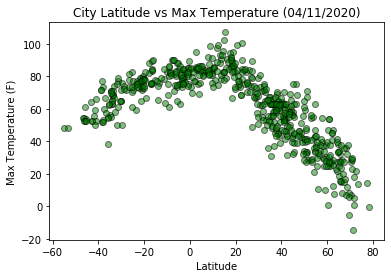

In [33]:
todays_date = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Lat"]).astype(float), pd.to_numeric(weather_df["Max Temp"]).astype(float),
            facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({todays_date})")


In [25]:
print("This scatterplot shows that temperature generally decreases as you move away from the equator.")

This scatterplot shows that temperature generally decreases as you move away from the equator.


#### Latitude vs. Humidity Plot

Text(0.5, 1.0, 'City Latitude vs % Humidity (04/11/2020)')

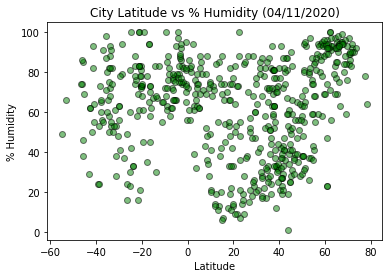

In [61]:
today_date = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Lat"]).astype(float), pd.to_numeric(weather_df["Humidity"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title(f"City Latitude vs % Humidity ({todays_date})")


In [37]:
print("This scatterplot shows that there does not appear to be a direct correlation between distance from the equator and humidity.")

This scatterplot shows that there does not appear to be a direct correlation between distance from the equator and humidity.


#### Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'City Latitude vs Cloudiness (04/11/2020)')

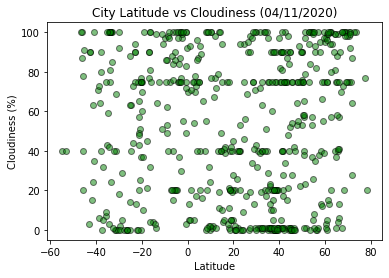

In [39]:
todays_date = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Lat"]).astype(float), pd.to_numeric(weather_df["Cloudiness"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({todays_date})")


In [42]:
print("This scatterplot shows that there does not appear to be a direct correlation between distance from the equator and cloudiness.")

This scatterplot shows that there does not appear to be a direct correlation between distance from the equator and cloudiness.


#### Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'City Latitude vs Wind Speed (04/11/2020)')

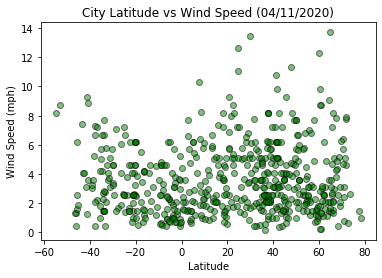

In [41]:
todays_date = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Lat"]).astype(float), pd.to_numeric(weather_df["Wind Speed"]).astype(float), facecolors="green", edgecolors="black", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({todays_date})")


In [43]:
print("This scatterplot shows that there does not appear to be a direct correlation between distance from the equator and wind speed.")

This scatterplot shows that there does not appear to be a direct correlation between distance from the equator and wind speed.


## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [47]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Lat"]).astype(float) < 0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared = -0.888


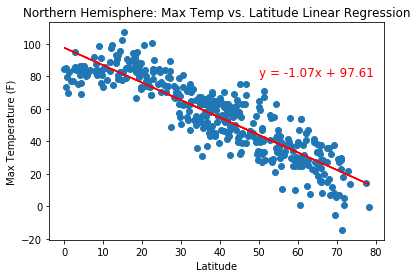

In [158]:
x_values = pd.to_numeric(northern_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere: Max Temp vs. Latitude Linear Regression")
print(f"r-squared = {round(rvalue,3)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,80),fontsize=12,color="red")

plt.show()

In [100]:
print("In the nothern hemisphere, max temperature decreases as you move away from the equator.")

In the nothern hemisphere, max temperature decreases as you move away from the equator.


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared = 0.739


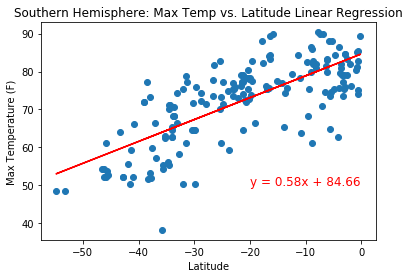

y = 0.58x + 84.66


In [142]:
x_values = pd.to_numeric(southern_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere: Max Temp vs. Latitude Linear Regression")
print(f"r-squared = {round(rvalue,3)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,50),fontsize=12,color="red")

plt.show()

In [127]:
print("In the southern hemisphere, max temperature increases as you move towards from the equator.")

In the southern hemisphere, max temperature increases as you move towards from the equator.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared = 0.344


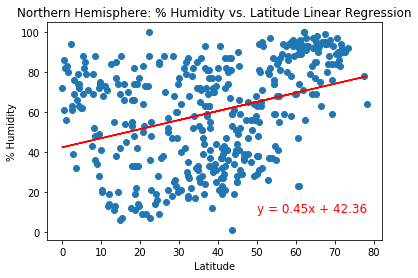

y = 0.45x + 42.36


In [143]:
x_values = pd.to_numeric(northern_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("Northern Hemisphere: % Humidity vs. Latitude Linear Regression")
print(f"r-squared = {round(rvalue,3)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,10),fontsize=12,color="red")

plt.show()

In [104]:
print("In the norther hemisphere, the regression does not support a correlation between the humidity and distance from the equator.")

In the norther hemisphere, the regression does not support a correlation between the humidity and distance from the equator.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared = 0.292


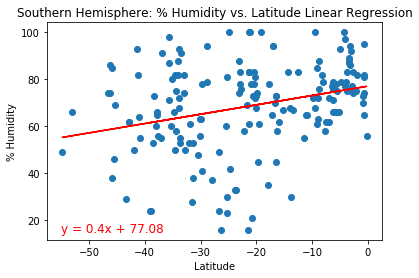

In [159]:
x_values = pd.to_numeric(southern_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
plt.title("Southern Hemisphere: % Humidity vs. Latitude Linear Regression")
print(f"r-squared = {round(rvalue,3)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,15),fontsize=12,color="red")

plt.show()

In [106]:
print("In the southern hemisphere, the regression does not support a correlation between the humidity and distance from the equator.")

In the southern hemisphere, the regression does not support a correlation between the humidity and distance from the equator.


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared = 0.208


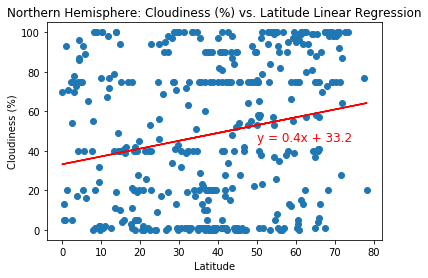

y = 0.4x + 33.2


In [148]:
x_values = pd.to_numeric(northern_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression")
print(f"r-squared = {round(rvalue,3)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(50,45),fontsize=12,color="red")

plt.show()

In [108]:
print("In the northern hemisphere, the regression does not support a correlation between cloudiness and distance from the equator.")

In the northern hemisphere, the regression does not support a correlation between cloudiness and distance from the equator.


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared = 0.189


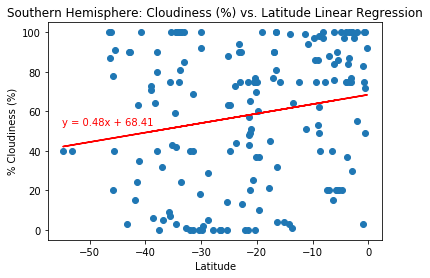

y = 0.48x + 68.41


In [153]:
x_values = pd.to_numeric(southern_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness (%)")
plt.title("Southern Hemisphere: Cloudiness (%) vs. Latitude Linear Regression")
print(f"r-squared = {round(rvalue,3)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-55,53),fontsize=10,color="red")

plt.show()

In [110]:
print("In the southern hemisphere, the regression does not support a correlation between cloudiness and distance from the equator.")

In the southern hemisphere, the regression does not support a correlation between cloudiness and distance from the equator.


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared = -0.007


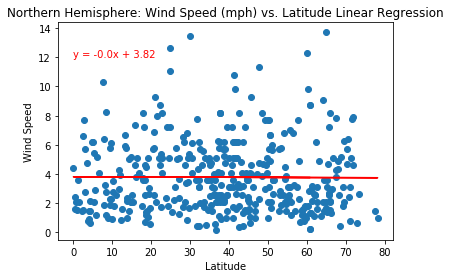

y = -0.0x + 3.82


In [155]:
x_values = pd.to_numeric(northern_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression")
print(f"r-squared = {round(rvalue,3)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,12),fontsize=10,color="red")

plt.show()

In [112]:
print("In the northern hemisphere, the regression does not support a correlation between windspeed and distance from the equator.")

In the northern hemisphere, the regression does not support a correlation between windspeed and distance from the equator.


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared = -0.33


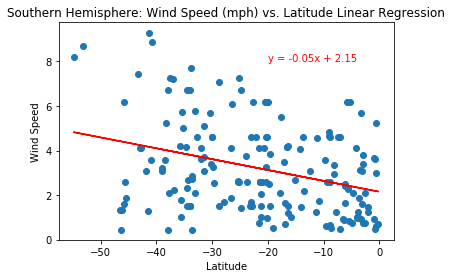

y = -0.05x + 2.15


In [156]:
x_values = pd.to_numeric(southern_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere: Wind Speed (mph) vs. Latitude Linear Regression")
print(f"r-squared = {round(rvalue,3)}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,8),fontsize=10,color="red")

plt.show()

In [88]:
print("In the southern hemisphere, the regression does not support a correlation between windspeed and distance from the equator.")

In the southern hemisphere, the regression does not support a correlation between windspeed and distance from the equator.
